# Project Overview: Predicting Loan Defaults

**Executive Summary**  
This project aims to develop a machine learning model to predict whether the customers of a financial institution will default on a loan based on data from their loan application. By accurately identifying potential defaulters, financial institutions can make more informed lending decisions, reduce losses, improve profitability, and increase operational efficiency through the automation of risk assessment.

**Problem**  
Predicting loan defaults is a challenging task due to the multitude of influencing factors such as customers' demographic, financial, location, and behavioral attributes. Traditional default prediction models often oversimplify complex relationships between customer features and default risk. Machine learning offers enhanced predictive capability by capturing non-linear patterns and intricate dependencies in loan application data, enabling more accurate predictions of loan default risk.

**Objectives**  
The project aims to:
- Develop a machine learning model to predict loan defaults using customer data from loan applications.
- Compare multiple models (e.g., Logistic Regression, Random Forest, XGBoost) using a suitable evaluation metric (such as AUC-PR).
- Identify key factors influencing loan default risk through feature importance analysis.

**Value Proposition**  
This project enables financial institutions to reduce loan default rates and make better and faster lending decisions by leveraging machine learning for automated and improved risk assessment. 

**Business Goals**  
The project aims to achieve the following business goals:
- Reduce losses by 5M-10M INR within 12 months of model deployment by decreasing the loan default rate by 10%-20%.
- Decrease loan processing time by 25%-40% by automating risk assessment, leading to less time spent on manual evaluations.
- Ensure 100% compliance with regulatory requirements and fair lending practices.

**Data**  
The dataset contains information provided by customers of a financial institution during the loan application process. It is sourced from the "Loan Prediction Based on Customer Behavior" dataset by Subham Jain, available on [Kaggle](https://www.kaggle.com/datasets/subhamjain/loan-prediction-based-on-customer-behavior). 

Dataset Statistics:
- Training set size: 252,000 records (12.3% defaults)
- Test set size: 28,000 records (12.8% defaults)
- 11 Features:
  - Demographic: Age, married, profession
  - Financial: Income, house ownership, car ownership
  - Location: City, state
  - Behavioral: Experience, current job years, current house years

Data Overview Table:

| Column | Description | Storage Type | Semantic Type | Theoretical Range | Training Data Range |
| :--- | :--- | :--- | :--- | :--- | :--- |
| Risk Flag | Defaulted on loan (0: No, 1: Yes) | Integer | Categorical (Binary) | [0, 1] | [0, 1] |
| Income | Income of the applicant | Integer | Numerical | [0, ∞] | [10K, 10M] |
| Age | Age of the applicant (in years) | Integer | Numerical | [18, ∞] | [21, 79] |
| Experience | Work experience (in years) | Integer | Numerical | [0, ∞] | [0, 20] |
| Profession | Applicant's profession | String | Categorical (Nominal) | Any profession [e.g., "Architect", "Dentist"] | 51 unique professions |
| Married | Marital status | String | Categorical (Binary) | ["single", "married"] | ["single", "married"] |
| House Ownership | Applicant owns or rents a house | String | Categorical (Nominal) | ["rented", "owned", "norent_noown"] | ["rented", "owned", "norent_noown"] |
| Car Ownership | Whether applicant owns a car | String | Categorical (Binary) | ["yes", "no"] | ["yes", "no"] |
| Current Job Years | Years in the current job | Integer | Numerical | [0, ∞] | [0, 14] |
| Current House Years | Years in the current house | Integer | Numerical | [0, ∞] | [10, 14] |
| City | City of residence | String | Categorical (Nominal) | Any city [e.g., "Mumbai", "Bangalore"] | 317 unique cities |
| State | State of residence | String | Categorical (Nominal) | Any state [e.g., "Maharashtra", "Tamil_Nadu"] | 29 unique states |

The dataset consists of three CSV files:
1. `Training Data.csv`: Contains all the features along with the target variable (`Risk Flag`) and an `ID` column. 
2. `Test Data.csv`: Contains only the features and an `ID` column from the test data.
3. `Sample Prediction Dataset.csv`: Contains the target variable (`Risk Flag`) and an `ID` column from the test data.

Example Training Data:

| Risk Flag | Income    | Age | Experience | Profession         | Married | House Ownership | Car Ownership | Current Job Years | Current House Years | City      | State         |
| :-------- | :-------- | :-- | :--------- | :----------------- | :------ | :-------------- | :------------ | :---------------- | :------------------ | :-------- | :------------ |
| 0         | 1,303,834 | 23  | 3          | Mechanical_engineer | single  | rented          | no            | 3                 | 13                   | Rewa      | Madhya_Pradesh |
| 1         | 6,256,451 | 41  | 2          | Software_Developer | single  | rented          | yes           | 2                 | 12                   | Bangalore | Tamil_Nadu    |
| 0         | 3,991,815 | 66  | 4          | Technical_writer   | married | rented          | no            | 4                 | 10                   | Alappuzha | Kerala        |

**Technical Requirements**  
The project must meet the following technical requirements:
- Data Preprocessing:
  - Load, clean, transform, and save data using `pandas` and `sklearn`.
  - Handle duplicates, incorrect data types, missing values, and outliers.
  - Extract features, scale numerical features, and encode categorical features.
- Exploratory Data Analysis (EDA):
  - Analyze descriptive statistics using `pandas` and `numpy`.
  - Visualize distributions, correlations, and relationships using `seaborn` and `matplotlib`.
- Modeling:
  - Train baseline models and perform hyperparameter tuning for binary classification task with `sklearn` and `xgboost`.
  - Baseline models: Logistic Regression, K-Nearest Neighbors, Support Vector Machine, Random Forest, Multi-Layer Perceptron, XGBoost.
  - Evaluate model performance using Area Under the Precision-Recall Curve (AUC-PR).
    - AUC-PR is more suitable to address class imbalance (12.3% defaults) with a focus on the positive class (preventing defaults) than accuracy, precision, recall, F1-score, and AUC-ROC.
    - Success criterion: Minimum AUC-PR of 0.70 on the test data.
  - Potentially use additional techniques to address class imbalance (e.g., SMOTE, class weights).
  - Visualize feature importance, show model prediction examples, and save the final model with `pickle`.
- Deployment:
  - Create a REST API for model deployment and integration with existing loan processing systems.
  - Implement efficient batch processing capabilities for multiple loan applications.
  - Deploy using cloud infrastructure to ensure scalability and security.
  - Develop monitoring systems for model performance and data drift.
- Stakeholders:
  - Loan officers: Direct users of the model predictions in day-to-day loan approvals.
  - Credit risk analysts: Provide subject matter expertise on loan default risk.
  - Compliance officers: Ensure the model complies with any legal and regulatory guidelines.
  - IT department: Manage the IT infrastructure and ensure data access for the model's development and deployment. 

By fulfilling these objectives and requirements, the project will provide a valuable tool for predicting loan defaults, thereby enhancing decision-making for financial institutions.

# Imports

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.ensemble import IsolationForest

# Data Loading
Load data from the three .csv files into three Pandas DataFrames.

In [9]:
try:
    df_train = pd.read_csv("data/training_data.csv")
    X_test = pd.read_csv("data/test_data.csv")
    y_test = pd.read_csv("data/sample_prediction_dataset.csv")
    print("Data loaded successfully.")
except FileNotFoundError:
    print("Error: File not found. Please check the file path.")
except pd.errors.EmptyDataError:
    print("Error: The file is empty.")
except pd.errors.ParserError:
    print("Error: The file content could not be parsed as a CSV.")
except PermissionError:
    print("Error: Permission denied when accessing the file.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

Data loaded successfully.


# Initial Data Inspection  
Basic exploration of the dataset to understand its structure and detect obvious issues.

In [13]:
# Show DataFrame info to check the number of rows and columns, data types and missing values
print("Training Data:")
print(df_train.info())
print("\nTest Data - Features:")
print(X_test.info())
print("\nTest Data - Target Variable:")
print(y_test.info())

Training Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Id                 252000 non-null  int64 
 1   Income             252000 non-null  int64 
 2   Age                252000 non-null  int64 
 3   Experience         252000 non-null  int64 
 4   Married/Single     252000 non-null  object
 5   House_Ownership    252000 non-null  object
 6   Car_Ownership      252000 non-null  object
 7   Profession         252000 non-null  object
 8   CITY               252000 non-null  object
 9   STATE              252000 non-null  object
 10  CURRENT_JOB_YRS    252000 non-null  int64 
 11  CURRENT_HOUSE_YRS  252000 non-null  int64 
 12  Risk_Flag          252000 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 25.0+ MB
None

Test Data - Features:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28000 entries, 0 to 27999

In [15]:
# Show top five rows of the training data
print("Training Data:")
df_train.head()

Training Data:


,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


In [17]:
# Show top five rows of the test data features
print("Test Data - Features:")
X_test.head()

Test Data - Features:


,ID,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS
0,1,7393090,59,19,single,rented,no,Geologist,Malda,West Bengal,4,13
1,2,1215004,25,5,single,rented,no,Firefighter,Jalna,Maharashtra,5,10
2,3,8901342,50,12,single,rented,no,Lawyer,Thane,Maharashtra,9,14
3,4,1944421,49,9,married,rented,yes,Analyst,Latur,Maharashtra,3,12
4,5,13429,25,18,single,rented,yes,Comedian,Berhampore,West Bengal,13,11


In [19]:
# Show top five rows of the test data target variable
print("Test Data - Target Variable:")
y_test.head()

Test Data - Target Variable:


,id,risk_flag
0,1,0
1,2,0
2,3,1
3,4,0
4,5,0


# Data Preprocessing

## Handling Inconsistent Column Names
Problem: Some column names are inconsistent across the training and test dataset (e.g., "Id" vs. "ID", "Risk_Flag" vs. "risk_flag").  
Solution: Consistently use snake_case for all column names in the training and test dataset.

In [23]:
# Change column names to lowercase and replace "/" with "_"
df_train.columns = df_train.columns.str.lower().str.replace("/single", "")
X_test.columns = X_test.columns.str.lower().str.replace("/single", "")
y_test.columns = y_test.columns.str.lower().str.replace("/single", "")

## Handling Duplicates

In [26]:
# Identify duplicates based on all columns
print("Training Data:")
print(df_train.duplicated().value_counts())
print("\nTest Data - Features:")
print(X_test.duplicated().value_counts())
print("\nTest Data - Target Variable:")
print(y_test.duplicated().value_counts())

Training Data:
False    252000
Name: count, dtype: int64

Test Data - Features:
False    28000
Name: count, dtype: int64

Test Data - Target Variable:
False    28000
Name: count, dtype: int64


No duplicates were found based on all columns in both the training and test data.

In [29]:
# Identify duplicates based on the ID column
print("Training Data:")
print(df_train.duplicated(subset=["id"]).value_counts())
print("\nTest Data - Features:")
print(X_test.duplicated(subset=["id"]).value_counts())
print("\nTest Data - Target Variable:")
print(y_test.duplicated(subset=["id"]).value_counts())

Training Data:
False    252000
Name: count, dtype: int64

Test Data - Features:
False    28000
Name: count, dtype: int64

Test Data - Target Variable:
False    28000
Name: count, dtype: int64


No duplicates were found based on the ID column in both the training and test data.

## Handling Incorrect Data Types

In [33]:
# Identify incorrect data types
print("Training Data:")
print(df_train.dtypes)
print("\nTest Data - Features:")
print(X_test.dtypes)
print("\nTest Data - Target Variable:")
print(y_test.dtypes)

Training Data:
id                    int64
income                int64
age                   int64
experience            int64
married              object
house_ownership      object
car_ownership        object
profession           object
city                 object
state                object
current_job_yrs       int64
current_house_yrs     int64
risk_flag             int64
dtype: object

Test Data - Features:
id                    int64
income                int64
age                   int64
experience            int64
married              object
house_ownership      object
car_ownership        object
profession           object
city                 object
state                object
current_job_yrs       int64
current_house_yrs     int64
dtype: object

Test Data - Target Variable:
id           int64
risk_flag    int64
dtype: object


No incorrect data types were found at first glance.

In [36]:
# Explore number of unique categories in object columns
print("Training Data:")
print(df_train[df_train.select_dtypes(include=["object"]).columns.tolist()].nunique())
print("\nTest Data - Features:")
print(X_test[X_test.select_dtypes(include=["object"]).columns.tolist()].nunique())

Training Data:
married              2
house_ownership      3
car_ownership        2
profession          51
city               317
state               29
dtype: int64

Test Data - Features:
married              2
house_ownership      3
car_ownership        2
profession          51
city               317
state               29
dtype: int64


Convert object columns with two unique categories to boolean columns:

In [40]:
# Convert married and car_ownership column from object to boolean
df_train["married"] = df_train["married"].map({"married": True, "single": False})
X_test["married"] = X_test["married"].map({"married": True, "single": False})
df_train["car_ownership"] = df_train["car_ownership"].map({"yes": True, "no": False})
X_test["car_ownership"] = X_test["car_ownership"].map({"yes": True, "no": False})

## Defining Column Types  
Define numerical, categorical and boolean columns for downstream tasks like additional preprocessing steps, exploratory data analysis, and machine learning.

In [87]:
# Define column types manually
numerical_columns = ["income", "age", "experience", "current_job_yrs", "current_house_yrs"]
categorical_columns = ["house_ownership", "profession", "city", "state"]
boolean_columns = ["married", "car_ownership", "risk_flag"]

## Feature Extraction

In [46]:
# Explore number of unique categories in categorical columns
print("Training Data:")
print(df_train[categorical_columns].nunique())
print("\nTest Data - Features:")
print(X_test[categorical_columns].nunique())

Training Data:
house_ownership      3
profession          51
city               317
state               29
dtype: int64

Test Data - Features:
house_ownership      3
profession          51
city               317
state               29
dtype: int64


## Handling Missing Values

In [49]:
# Identify missing values
print("Training Data:")
print(df_train.isnull().sum())
print("\nTest Data - Features:")
print(X_test.isnull().sum())
print("\nTest Data - Target Variable:")
print(y_test.isnull().sum())

Training Data:
id                   0
income               0
age                  0
experience           0
married              0
house_ownership      0
car_ownership        0
profession           0
city                 0
state                0
current_job_yrs      0
current_house_yrs    0
risk_flag            0
dtype: int64

Test Data - Features:
id                   0
income               0
age                  0
experience           0
married              0
house_ownership      0
car_ownership        0
profession           0
city                 0
state                0
current_job_yrs      0
current_house_yrs    0
dtype: int64

Test Data - Target Variable:
id           0
risk_flag    0
dtype: int64


No missing values were found in any of the columns in both the training and test data.

## Handling Outliers

### 3SD Method  
Identify and remove univariate outliers in numerical columns by applying the 3 standard deviation (SD) rule. Specifically, a data point is considered an outlier if it falls more than 3 standard deviations above or below the mean of the column. 

In [52]:
# Create a custom transformer class to identify and remove outliers using the 3SD method
class OutlierRemover3SD(BaseEstimator, TransformerMixin):
    def fit(self, df, numerical_columns):
        # Convert single column string to list
        if isinstance(numerical_columns, str):
            numerical_columns = [numerical_columns]
            
        # Calculate statistics (mean, standard deviation, cutoff values) for each column
        self.stats_ = pd.DataFrame(index=numerical_columns)
        self.stats_["mean"] = df[numerical_columns].mean()
        self.stats_["sd"] = df[numerical_columns].std()
        self.stats_["lower_cutoff"] = self.stats_["mean"] - 3 * self.stats_["sd"]
        self.stats_["upper_cutoff"] = self.stats_["mean"] + 3 * self.stats_["sd"]

        # Create masks for filtering outliers 
        self.masks_ = (df[numerical_columns] >= self.stats_["lower_cutoff"]) & (df[numerical_columns] <= self.stats_["upper_cutoff"])  # masks by column
        self.final_mask_ = self.masks_.all(axis=1)  # single mask across all columns

        # Calculate number of outliers
        self.stats_["outliers"] = (~self.masks_).sum()  # by column
        self.outliers_ = (~self.final_mask_).sum()  # across all columns
        
        # Show statistics and number of outliers
        print(f"Statistics and outliers: \n{self.stats_}")
        if len(numerical_columns) == 1:
            print(f"\n{self.outliers_} rows contain outliers in the '{numerical_columns[0]}' column.")
        else:
            print(f"\n{self.outliers_} rows contain outliers in one or more numerical columns.")
  
        return self

    def transform(self, df):
        # Remove outliers based on the final mask
        print(f"{self.outliers_} rows with outliers removed.")
        return df[self.final_mask_]

    def fit_transform(self, df, numerical_columns):
        # Perform both fit and transform 
        return self.fit(df, numerical_columns).transform(df)

In [54]:
# Initialize outlier remover 
outlier_remover_3sd = OutlierRemover3SD()

# Identify and remove outliers
df_train = outlier_remover_3sd.fit_transform(df_train, numerical_columns)

Statistics and outliers: 
                           mean            sd  lower_cutoff  upper_cutoff  \
income             4.997117e+06  2.878311e+06 -3.637816e+06  1.363205e+07   
age                4.995407e+01  1.706385e+01 -1.237493e+00  1.011456e+02   
experience         1.008444e+01  6.002590e+00 -7.923333e+00  2.809221e+01   
current_job_yrs    6.333877e+00  3.647053e+00 -4.607282e+00  1.727504e+01   
current_house_yrs  1.199779e+01  1.399037e+00  7.800683e+00  1.619490e+01   

                   outliers  
income                    0  
age                       0  
experience                0  
current_job_yrs           0  
current_house_yrs         0  

0 rows contain outliers in one or more numerical columns.
0 rows with outliers removed.


### 1.5 IQR Method  
Identify and remove univariate outliers in numerical columns using the 1.5 interquartile range (IQR) rule. Specifically, a data point is considered an outlier if it falls more than 1.5 interquartile ranges above the third quartile (Q3) or below the first quartile (Q1) of the column.   

In [56]:
# Create a custom transformer class to identify and remove outliers using the 1.5 IQR method
class OutlierRemoverIQR(BaseEstimator, TransformerMixin):
    def fit(self, df, numerical_columns):
        # Convert single column string to list
        if isinstance(numerical_columns, str):
            numerical_columns = [numerical_columns]
        
        # Calculate statistics (first quartile, third quartile, interquartile range, cutoff values) for each column
        self.stats_ = pd.DataFrame(index=numerical_columns)
        self.stats_["Q1"] = df[numerical_columns].quantile(0.25)
        self.stats_["Q3"] = df[numerical_columns].quantile(0.75)
        self.stats_["IQR"] = self.stats_["Q3"] - self.stats_["Q1"]
        self.stats_["lower_cutoff"] = self.stats_["Q1"] - 1.5 * self.stats_["IQR"]
        self.stats_["upper_cutoff"] = self.stats_["Q3"] + 1.5 * self.stats_["IQR"]

        # Create masks for filtering outliers 
        self.masks_ = (df[numerical_columns] >= self.stats_["lower_cutoff"]) & (df[numerical_columns] <= self.stats_["upper_cutoff"])  # masks by column
        self.final_mask_ = self.masks_.all(axis=1)  # single mask across all columns

        # Calculate number of outliers
        self.stats_["outliers"] = (~self.masks_).sum()  # by column
        self.outliers_ = (~self.final_mask_).sum()  # across all columns
               
        # Show statistics and number of outliers
        print(f"Statistics and outliers: \n{self.stats_}")
        if len(numerical_columns) == 1:
            print(f"\n{self.outliers_} rows contain outliers in the '{numerical_columns[0]}' column.")
        else:
            print(f"\n{self.outliers_} rows contain outliers in one or more numerical columns.")
        
        return self

    def transform(self, df):
        # Remove outliers based on the final mask
        print(f"{self.outliers_} rows with outliers removed.")
        return df[self.final_mask_]

    def fit_transform(self, df, numerical_columns):
        # Perform both fit and transform
        return self.fit(df, numerical_columns).transform(df)

In [58]:
# Initialize outlier remover 
outlier_remover_iqr = OutlierRemoverIQR()

# Identify and remove outliers
df_train = outlier_remover_iqr.fit_transform(df_train, numerical_columns)

Statistics and outliers: 
                          Q1         Q3        IQR  lower_cutoff  \
income             2503015.0  7477502.0  4974487.0    -4958715.5   
age                     35.0       65.0       30.0         -10.0   
experience               5.0       15.0       10.0         -10.0   
current_job_yrs          3.0        9.0        6.0          -6.0   
current_house_yrs       11.0       13.0        2.0           8.0   

                   upper_cutoff  outliers  
income               14939232.5         0  
age                       110.0         0  
experience                 30.0         0  
current_job_yrs            18.0         0  
current_house_yrs          16.0         0  

0 rows contain outliers in one or more numerical columns.
0 rows with outliers removed.


### Isolation Forest
Identify and remove multivariate outliers using the isolation forest algorithm.

In [160]:
# Initialize isolation forest
isolation_forest = IsolationForest(contamination=0.05, random_state=42)

# Create list of numerical and boolean features (without the target variable "risk_flag")
numerical_boolean_features = numerical_columns + ["married", "car_ownership"]

# Fit isolation forest
isolation_forest.fit(df_train[numerical_boolean_features])

# Predict outliers
df_train["outlier"] = isolation_forest.predict(df_train[numerical_boolean_features])
df_train["outlier_score"] = isolation_forest.decision_function(df_train[numerical_boolean_features])

# Show number of outliers
n_outliers = df_train["outlier"].value_counts()[-1]
contamination = df_train["outlier"].value_counts()[-1] / df_train["outlier"].value_counts().sum()
print(f"{n_outliers} rows ({100 * contamination:.1f}%) were identified as multivariate outliers.")

12571 rows (5.0%) were identified as multivariate outliers.


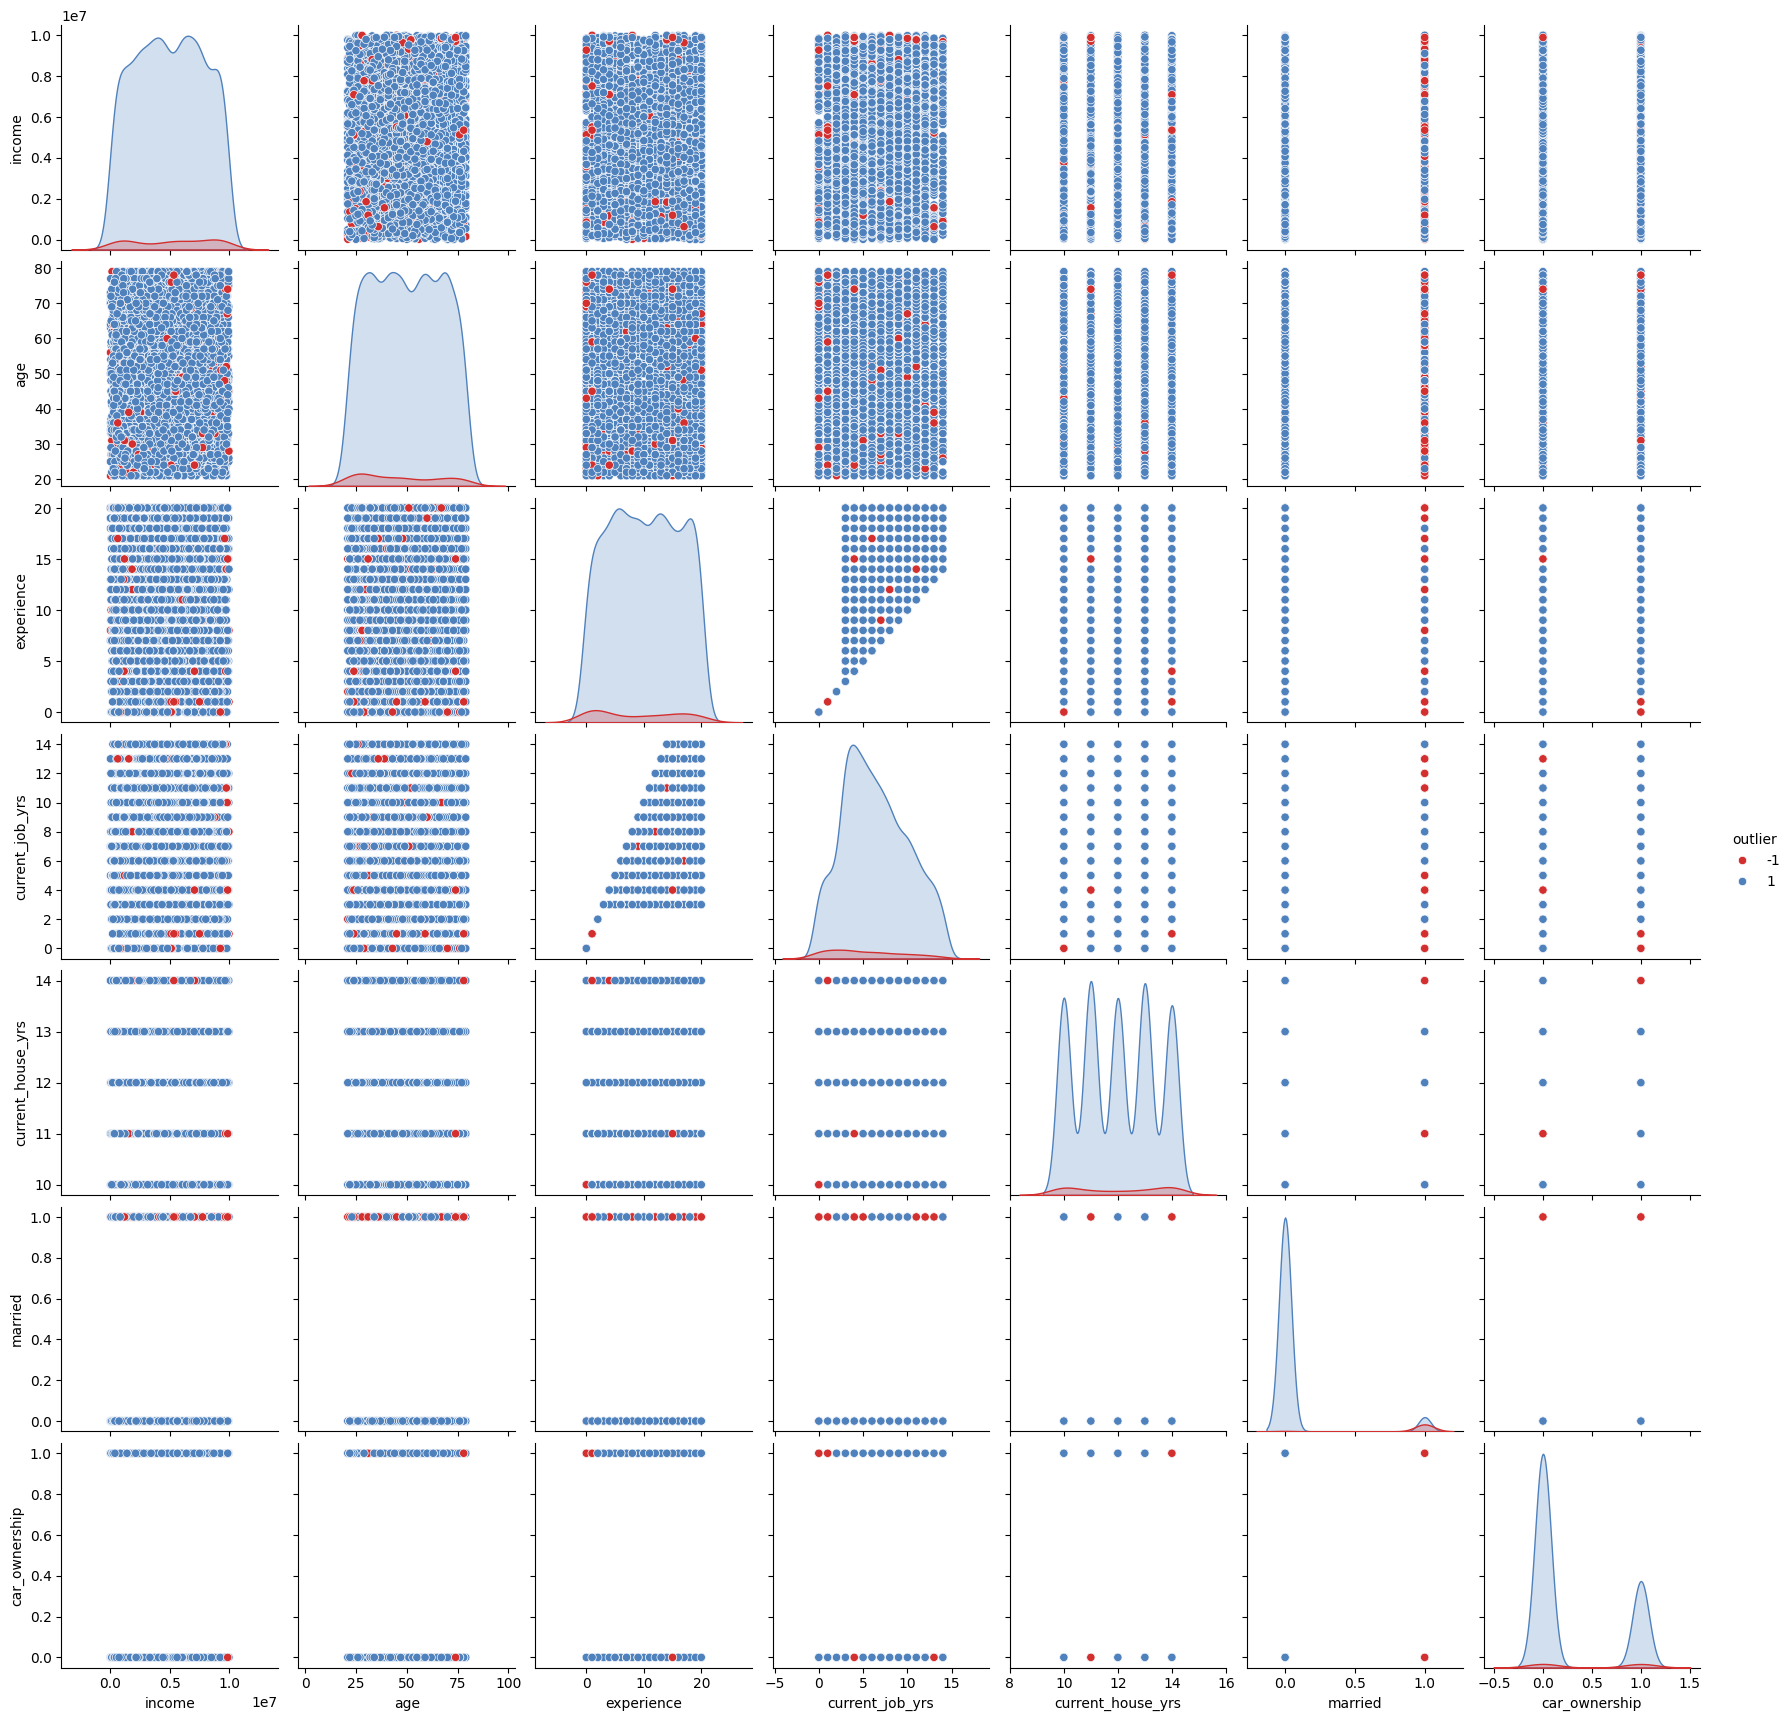

In [166]:
# Scatter plot matrix to visualize outliers
df_train_subsample = df_train[numerical_boolean_features + ["outlier"]].sample(n=5000, random_state=42)
sns.pairplot(df_train_subsample, hue="outlier", palette={1: "#4F81BD", -1: "#D32F2F"})

# Future Improvements

**Data Enrichment**:  
To enhance the model's performance and business value, data enrichment with the following financial features is recommended:
- Loan amount 
- Loan duration
- Interest rate
- Type of loan (e.g., personal, home, vehicle)
- Existing debt
- Credit score

**Enhanced Analysis Capabilities**:  
The addition of these features, particularly loan amount, would enable more precise risk assessment and better alignment with business objectives through cost-sensitive evaluation metrics incorporating actual monetary values. Cost-sensitive metrics or expected monetary value incorporate the actual cost of defaults (false negatives) and the opportunity cost of rejecting good loans (false positives).